In [1]:
# import your modules here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# 1. Load Data
df = pd.read_csv("NutritionDS.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [3]:
# 2. Filter Data
# The dataset contains multiple questions. We must focus on one target concept.
# Here, we filter for "Obesity" rates.
target_question = 'Percent of adults aged 18 years and older who have obesity'
df_filtered = df[df['Question'] == target_question].copy()
#this just creates a copy df to not change the original df
#it also creates a new categorical text entry for the target_question

In [4]:
# 3. Select Features and Target
# 'Stratification1' captures all demographic info (Income, Age, Race, Sex)
feature_cols = ['YearStart', 'LocationDesc', 'Stratification1']
target_col = 'Data_Value'

df_filtered[target_col] = pd.to_numeric(df_filtered[target_col], errors='coerce')
df_model = df_filtered[feature_cols + [target_col]].dropna()

X = df_model[feature_cols]

df_model['Obesity_Class'] = (df_model['Data_Value'] >= 30).astype(int)

y = df_model['Obesity_Class']

In [5]:
# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Define Preprocessing Pipeline
# Numerical features (Year) -> Standard Scaler
# Categorical features (Location, Demographics) -> OneHotEncoder
numerical_features = ['YearStart']
categorical_features = ['LocationDesc', 'Stratification1']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Logistic Regression

Logistic Regression Results
Accuracy: 0.8640858999717435

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1440
           1       0.87      0.90      0.89      2099

    accuracy                           0.86      3539
   macro avg       0.86      0.86      0.86      3539
weighted avg       0.86      0.86      0.86      3539


Predictions: [1 0 0 0 0 1 1 0 1 0]

Cross-Validation: [0.85381356 0.87853107 0.87570621 0.85875706 0.86299435 0.86219081
 0.8664311  0.86713781 0.84946996 0.86925795]
Average CV Score: 0.864428989239584
[[1163  277]
 [ 204 1895]]


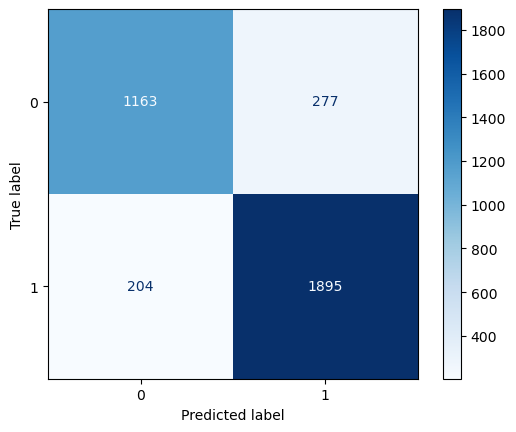

In [7]:
# Logistic Regression Model

# 1. Create the Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])

# 2. Train and Evaluate Logistic Regression Model
lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

print(f"Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nPredictions:", y_pred_lr[:10])

cv_scores_lr = cross_val_score(lr_pipeline, X_train, y_train, cv = 10)
print("\nCross-Validation:", cv_scores_lr)
print("Average CV Score:", cv_scores_lr.mean())

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_pipeline.classes_)
disp.plot(cmap='Blues')

# Random Forest Classification

Random Forest Classifier Results
Accuracy: 0.8686069511161345

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1440
           1       0.88      0.90      0.89      2099

    accuracy                           0.87      3539
   macro avg       0.87      0.86      0.86      3539
weighted avg       0.87      0.87      0.87      3539


Predictions: [1 0 0 0 0 1 1 0 1 1]

Cross-Validation Accuracy Scores: [0.84463277 0.86864407 0.875      0.85875706 0.87076271 0.87067138
 0.87279152 0.8664311  0.86784452 0.86784452]
Average CV Accuracy: 0.866337964903875
[[1184  256]
 [ 209 1890]]


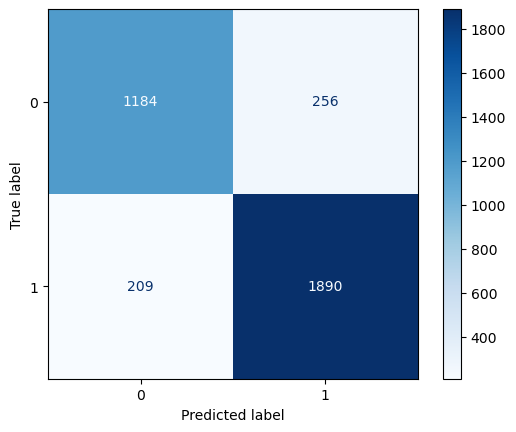

In [10]:
# Random Forest Classifier Model
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rfc_pipeline.fit(X_train, y_train)

y_pred_rfc = rfc_pipeline.predict(X_test)

print(f"Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))
print("\nPredictions:", y_pred_rfc[:10])

cv_scores_rfc = cross_val_score(rfc_pipeline, X_train, y_train, cv=10)
print("\nCross-Validation Accuracy Scores:", cv_scores_rfc)
print("Average CV Accuracy:", cv_scores_rfc.mean())

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc_pipeline.classes_)
disp.plot(cmap='Blues')


# Support Vector Classification

SVC Results:
Accuracy: 0.8776490534049166

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1440
           1       0.88      0.92      0.90      2099

    accuracy                           0.88      3539
   macro avg       0.88      0.87      0.87      3539
weighted avg       0.88      0.88      0.88      3539


Predictions: [1 0 0 0 0 1 1 0 1 0]

Cross-Validation Accuracy Scores: [0.85169492 0.88983051 0.89689266 0.86228814 0.87570621 0.88268551
 0.87561837 0.87349823 0.86713781 0.8819788 ]
Average CV Accuracy: 0.8757331157293725
[[1180  260]
 [ 173 1926]]


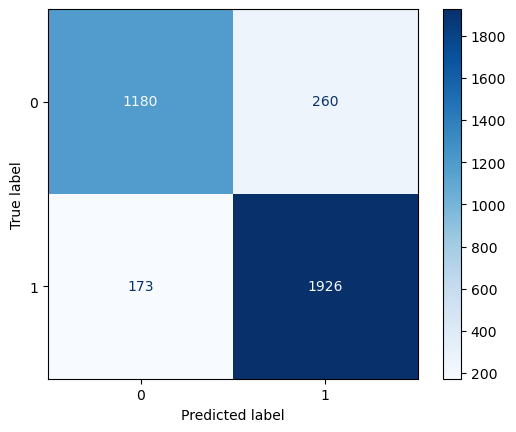

In [9]:
# Support Vector Classification (SVC)

# 1. Reuse the SAME preprocessor from before
# (It already has StandardScaler for 'YearStart' and OneHotEncoder for the others)
numerical_features = ['YearStart']
categorical_features = ['LocationDesc', 'Stratification1']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# 2. Make SVC Pipeline
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVC(kernel='rbf', C=1.0))
])
'''
epsilon = 0.1 means if prediction is 0.1 close to real value, then prediction is ok
C = 1.0 is the 'punishment' parameter, 1.0 is balanced, not too strict or loose
'''

# 3. Train
svc_pipeline.fit(X_train, y_train)

y_pred_svc = svc_pipeline.predict(X_test)

print("SVC Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))
print("\nPredictions:", y_pred_svc[:10])

cv_scores_svc = cross_val_score(svc_pipeline, X_train, y_train, cv=10, scoring='accuracy')

print("\nCross-Validation Accuracy Scores:", cv_scores_svc)
print("Average CV Accuracy:", cv_scores_svc.mean())

cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_pipeline.classes_)
disp.plot(cmap='Blues')